In [7]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

In [8]:
#Based on Mesa Module
class SingleGrid:
    """Class for a grid containing a maximum of one element per cell
    
    Grid cells are indexed by [x][y], where [0][0] is assumed to be the
    bottom-left and [width-1][height-1] is the top-right.

    Properties:
        width, height: The grid's width and height. width referring to y and height to x
        grid: List-of-lists 
    """

    

    def __init__(self, width: int, height: int) -> None:
        """Create a new grid

        Args:
            width, height: the widt and height of the grid
        """
        default_val = 0.0
 
        self.height = height
        self.width = width
        #   Add Cache        
        self.grid =  []

        for x in range(self.width): 
            col = []
            for y in range(self.height):
                col.append(default_val)
            self.grid.append(col)

    def spread_grid(self, radius: int):
        temp_grid = [[0 for i in range(self.width)] for j in range(self.height)]
        for y in range(self.height):
            for x in range(self.width):
                pos = (x,y)
                neighborhood = self.get_neighborhood(pos, radius)
                spread_amount = self.get_value(pos) / len(neighborhood)
                for neighbor_pos in neighborhood:
                    n_x = neighbor_pos[0]
                    n_y = neighbor_pos[1]
                    temp_grid[n_x][n_y] += spread_amount
        self.grid = temp_grid            
        

    def visualize_grid(self):
        for y in range(self.height - 1, 0 - 1, -1):
            print(self.grid[y]) 

    def return_grid(self):
        return self.grid

    def spread(self, pos: set, radius: int):
        """Distribute value equally to neighboring cells"""     
        #   Get Neighborhood
        neighborhood = self.get_neighborhood(pos, radius)
        #   Divide Value By Length
        spread_amount = self.get_value(pos) / len(neighborhood)
        #   Set Self to 0
        self.change_value(pos, 0)
        #   Add to neighborhood
        for cell in neighborhood:
            self.add_value(cell, spread_amount)

    def get_value(self, pos: set) -> float:
        """Get value of a given cell"""
        x, y = pos
        return self.grid[x][y]
    
    def add_value(self, pos: set, value: float):
        """Add value to a given cell"""
        x,y = pos
        self.grid[x][y] += value

    def change_value(self, pos: set, value: float):
        """Change value of a given cell"""
        x, y = pos
        self.grid[x][y] = value

    def get_neighborhood(self, pos: set, radius: int) -> list:
        
        coordinates = [] 
        # TODO IMPLEMENT CACHE FOR ALREADY PARSED CELLS
        x,y = pos
        for dy in range(-radius, radius + 1):
            for dx in range(-radius, radius +1):
                coord = (x + dx, y + dy)
                if self.out_of_bounds(coord):
                    continue
                coordinates.append(coord)
        return coordinates 

    def out_of_bounds(self, pos) -> bool:
        x,y = pos
        return x < 0 or x >= self.width or y < 0 or y >= self.height

In [9]:
x = SingleGrid(3, 3)
#   Test Grid Init
print('Visualizing Grid')
x.visualize_grid()
print()

#   Test Change Value
print('Change (0,0) to 1')
x.change_value((1,1), 10.0)
x.visualize_grid()
print()

#   Test Get Value
print('Get value of (0,0)')
print(x.get_value((0,0)))

Visualizing Grid
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]

Change (0,0) to 1
[0.0, 0.0, 0.0]
[0.0, 10.0, 0.0]
[0.0, 0.0, 0.0]

Get value of (0,0)
0.0


In [10]:
# Test Spread
x.visualize_grid
x.spread_grid(1)
x.visualize_grid()

[1.1111111111111112, 1.1111111111111112, 1.1111111111111112]
[1.1111111111111112, 1.1111111111111112, 1.1111111111111112]
[1.1111111111111112, 1.1111111111111112, 1.1111111111111112]


5.000000000000002


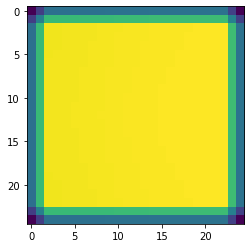

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

interval = 200
fps = 1000/interval

#   Visualize with heat map
lake = SingleGrid(25, 25)
lake.change_value((12, 12), 1.0)
lake.change_value((18, 12), 1.0)
lake.change_value((12, 6), 1.0)
lake.change_value((6, 12), 1.0)
lake.change_value((12, 19), 1.0)
fig, ax = plt.subplots()

frames = []
frame = ax.imshow(lake.return_grid())
frames.append([frame])
for i in range(100):
    lake.spread_grid(2)
    frame = ax.imshow(lake.return_grid())
    frames.append([frame])

res = [sum(i) for i in zip(*lake.return_grid())]
print(sum(res))

#   Makes Artist Object
artist = animation.ArtistAnimation(fig, frames, interval=interval, blit=True, repeat_delay=1000)
#   Pick the Writer you want to use
gifwriter = animation.PillowWriter(fps=fps)
#   Save as gif
artist.save('spread.gif',writer=gifwriter)

In [12]:
lake = SingleGrid(6,6)
lake.change_value((3,3), 1.0)

In [13]:
lake.spread_grid(1)

frame = ax.imshow(lake.return_grid())